## Fractal Interpolation Function Test

The purpose of this notebook is to illustrate a simple example of a fractal iterpolation function. We take the (very small) time series $\{(0,0),(1,1),(2,0)\}$ and construct an iterated function system in the plane whose attractor is the graph of an continuous interpolation function for this data set.

In fact, there are two free parameters in the definition of the system, so we toy around with them to see what different interpolation functions we can get.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = (16,10)

Given a positive integer $n$, the function "codelist" returns the list of integers from $0$ to $2^n - 1$ (inclusive) in binary form, as strings. We print codelist(3) as an example.

In [104]:
def codelist(n):
    m = 0
    fns = []
    while m < 2**n:
        fns.append(bin(m)[2:])
        m = m + 1
    return(fns)

codelist(3)

['0', '1', '10', '11', '100', '101', '110', '111']

The function "normalize" takes a list of strings and makes each string the same length by adding zeros on the left of the short ones. We print normalize(codelist(3)) as an example.

In [105]:
def normalize(x):
    m = 0
    while m <= len(x) - 1:
        if len(x[m]) < len(max(x)):
            while len(x[m]) < len(max(x)):
                x[m] = '0' + x[m]
        else:
            x[m] = x[m]
        m = m + 1
    return x

normalize(codelist(3))

['000', '001', '010', '011', '100', '101', '110', '111']

Now the fun part. The function "f" forms two functions $f_0$ and $f_1$ from the plane $\mathbb R^2$ to itself. $f_0(x,y)=(\frac12x,\frac12x+\frac14y)$ and $f_1(x,y)=(\frac12x+1,-\frac12x+\frac14y+1)$.

Given a string $x_1,x_2,\ldots,x_n$ of $0$s and $1$s, the function "iterate" puts the interval $[0,2]$ on the $x$-axis through f(f(f(...f(,x_1),x_2),...,x_n).

In [106]:
def f(theta, eta, k):
    if k == 0:
        return (1/2)*theta, (1/2)*theta + (1/4)*eta
    elif k == 1:
        return (1/2)*theta + 1, (-1/2)*theta + (1/4)*eta + 1 

def iterate(a):
    x = np.linspace(0, 2, 200)
    y = 0*x
    for m in np.arange(0, len(a)):
        x, y = f(x, y, float(a[m]))
    ax.plot(x, y)

Now we plot! (We iterate the system 10 times.)

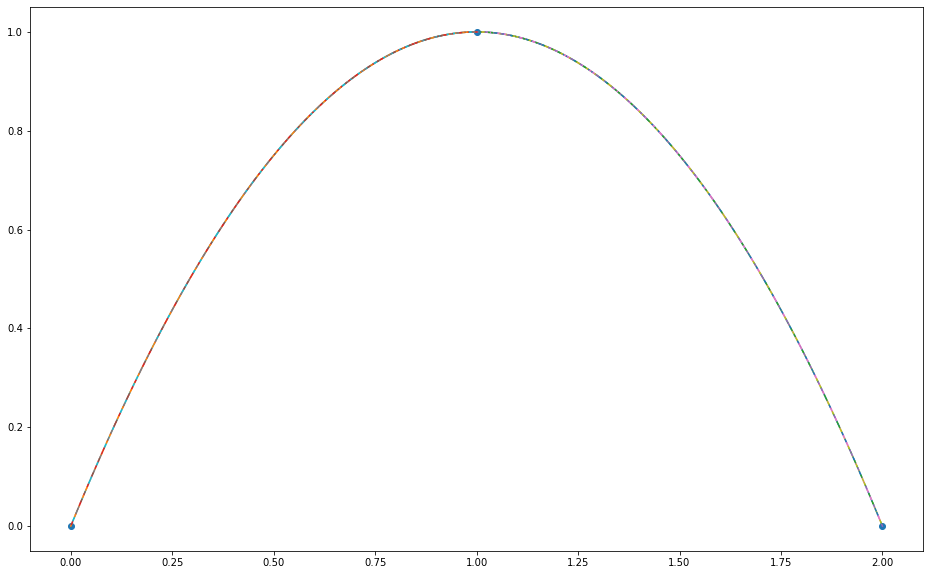

In [107]:
fig, ax = plt.subplots()
t = (0,1,0)
ax.plot(t, 'o')

def fif(n):
    for a in normalize(codelist(n)):
        iterate(a)

fif(10)

It looks a lot like the graph of the function $g(x)=2x-x^2$. (In fact that's exactly what it's converging to, one can prove this.) Let's try varying the parameters; let's replace both occurrences of 1/4 in the definition of "f" with 1/2.

In [120]:
def f2(theta, eta, k):
    if k == 0:
        return (1/2)*theta, (1/2)*theta + (1/2)*eta   #Notice the 1/4 is gone, replaced with 1/2
    elif k == 1:
        return (1/2)*theta + 1, (-1/2)*theta + (1/2)*eta + 1 

def iterate2(a):
    x = np.linspace(0, 2, 200)
    y = 0*x
    for m in np.arange(0, len(a)):
        x, y = f2(x, y, float(a[m]))
    ax.plot(x, y)

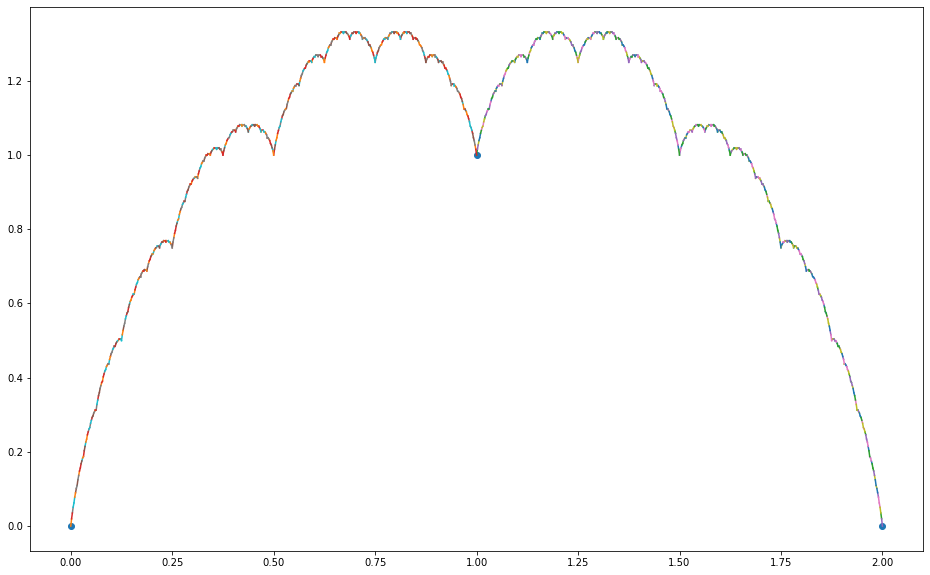

In [121]:
fig, ax = plt.subplots()
t = (0,1,0)
ax.plot(t, 'o')

def fif2(n):
    for a in normalize(codelist(n)):
        iterate2(a)

fif2(10)

This looks a bit more wild!

One more, and this time we'll make the two parameters different. Let's choose -1/2 and 1/2.

In [127]:
def f3(theta, eta, k):
    if k == 0:
        return (1/2)*theta, (1/2)*theta + (-1/2)*eta   #Notice the 1/4 is gone, replaced with 1/2
    elif k == 1:
        return (1/2)*theta + 1, (-1/2)*theta + (3/4)*eta + 1 

def iterate3(a):
    x = np.linspace(0, 2, 200)
    y = 0*x
    for m in np.arange(0, len(a)):
        x, y = f3(x, y, float(a[m]))
    ax.plot(x, y)

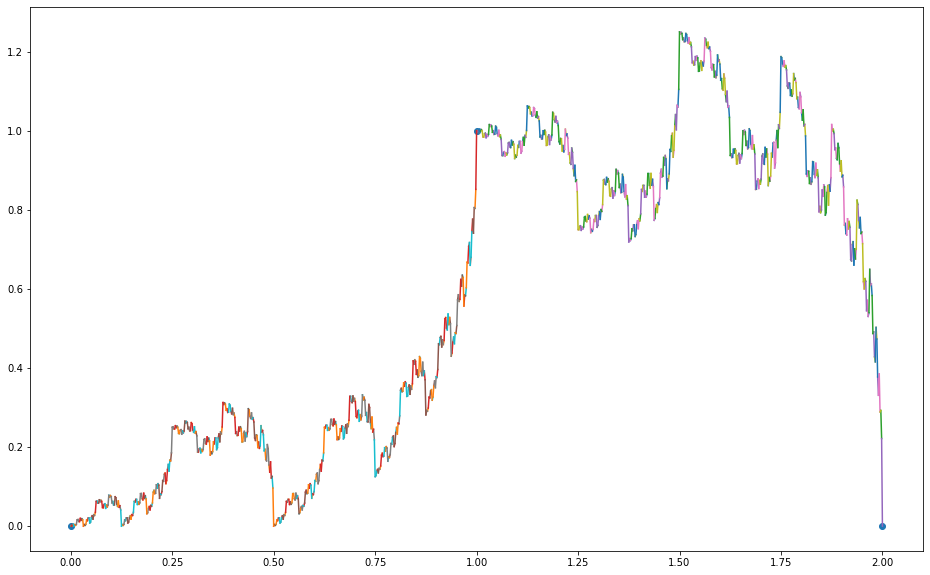

In [128]:
fig, ax = plt.subplots()
t = (0,1,0)
ax.plot(t, 'o')

def fif3(n):
    for a in normalize(codelist(n)):
        iterate3(a)

fif3(10)

Cool!

In fact, we can choose the parameters, call them $d_1$ and $d_2$, to be any floats such that $|d_n|<1$ for $n=1,2$. I'm looking forward to a few things:

-Taking a closer look at what happens when we vary the parameters more.

-Seeing what happens with a huge time series with a lot more than 3 points.

-How these functions perform when serving as finer training data for machine learning models.